In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import font_manager

In [6]:
methods = ['shap', 'signed_normalized_l2_avg', 'signed_normalized_l2_noavg',
           'signed_nonnormalized_l2_avg', 'signed_nonnormalized_l2_noavg',
           'nonl2_avg', 'nonl2_noavg', 'l2_ranking', 'nonl2_ranking',
           'normalized_l2_ranking', 'baseline', 'mdi']
tasks = ["regression", "classification"]
use_test = False
n_samples = [50, 100, 250, 500, 1000]
mean_results = {}
for method in methods:
    x1_mat = np.zeros((len(tasks), len(n_samples)))
    for task_idx in range(len(tasks)):
        for n_idx in range(len(n_samples)):
            if method == "mdi":
                rankings = np.zeros((5, 50)) # 5 features, 50 seeds
                for seed in range(1, 51):
                    rankings[:, seed-1] = pd.read_csv(f"results/{tasks[task_idx]}/n{n_samples[n_idx]}/seed{seed}/rankings/mdi.csv").to_numpy().reshape(-1)
                rankings = np.mean(rankings, axis=1)
                x1_mat[task_idx, n_idx] = rankings[0]
            else:
                rankings = np.zeros((n_samples[n_idx], 5, 50)) # n_samples[n_idx] samples, 5 features, 50 seeds
                for seed in range(1, 51):
                    rankings[:, :, seed-1] = pd.read_csv(f"results/{tasks[task_idx]}/n{n_samples[n_idx]}/seed{seed}/rankings/{method}.csv").to_numpy()
                rankings = np.mean(rankings, axis=2)
                # average first columns in rankings
                x1_mat[task_idx, n_idx] = np.mean(rankings[:, 0])
    mean_results[method] = x1_mat

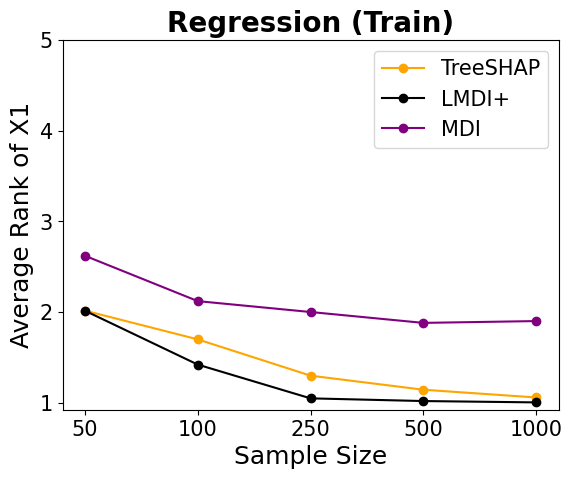

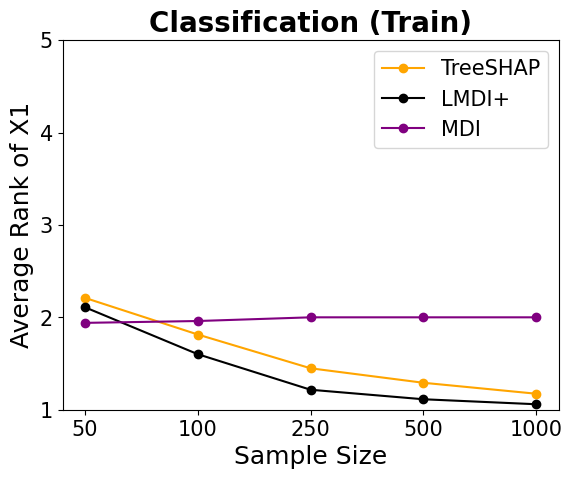

In [7]:
viz_methods = ['shap', 'nonl2_noavg', 'mdi']
titles = {'shap': 'TreeSHAP', 'nonl2_noavg': 'LMDI+', 'mdi': 'MDI'}
title = ["Regression", "Classification"]
test = ["Train", "Test"]
colors = {'shap': 'orange', 'nonl2_noavg': 'black', 'mdi': 'purple'}
for task_idx in range(len(tasks)): 
    for method in viz_methods:
        # plot results, where each group is a separate line on the plot
        plt.plot(mean_results[method][task_idx, :] + 1, marker = "o",
                 label=f"{titles[method]}", color = colors[method])
        # x-axis ticks should be rho values
        plt.xticks(range(len(n_samples)), n_samples)
        plt.yticks(range(1, 6), range(1, 6))
        plt.xlabel("Sample Size", fontsize=18)
        # make xaxis label big
        plt.tick_params(axis='both', labelsize=15)
        # y-axis label should be Average Ranking
        plt.ylabel("Average Rank of X1", fontsize=18)
    plt.title(f"{title[task_idx]} ({test[int(use_test)]})", fontsize=20, fontweight='bold')
    plt.legend(fontsize=15)
    plt.show()